# Packages

In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score
import warnings
warnings.filterwarnings('ignore')

# Reading Data as a DataFrame

In [2]:
hepatitis_data = pd.read_csv("arrhythmia.data", header=None)
df = pd.DataFrame(hepatitis_data)

# Showing Data

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


## Data Sample ( first 5 rows)

In [4]:
df[279].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: 279, dtype: int64

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


## Data Description 

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


## Data Shape

In [7]:
lines , columns = df.shape
print(f'lines : {lines}  Columns : {columns}')

lines : 452  Columns : 280


## Replacing "?" with NumPy "Nan"

In [8]:
df.replace(['?'], np.nan, inplace=True)

## Columns Types

In [9]:
print(df.dtypes)

0        int64
1        int64
2        int64
3        int64
4        int64
        ...   
275    float64
276    float64
277    float64
278    float64
279      int64
Length: 280, dtype: object


## Classe Distribution 

In [10]:
Distribution = df[279].value_counts()
Distribution_names = []
Distribution_counts = []
classes = ["Normal", "Ischemic changes", "Old Anterior Myocardial Infarction", "Old Inferior Myocardial Infarction", "Sinus tachycardy", "Sinus bradycardy", "Ventricular Premature Contraction (PVC)", "Supraventricular Premature Contraction", "Left bundle branch block", "Right bundle branch block", "1. degree AtrioVentricular block", "2. degree AV block", "3. degree AV block", "Left ventricule hypertrophy", "Atrial Fibrillation or Flutter", "Others"]
for item in range(len(classes)):
    Distribution_names.append(classes[item])
    if item + 1 in Distribution:      
        Distribution_counts.append(Distribution[item+1])
    else:
        Distribution_counts.append(0)
Distributions = {'Classe':Distribution_names,'Count':Distribution_counts}
Distributions = pd.DataFrame(Distributions)
Distributions

,Classe,Count
0,Normal,245
1,Ischemic changes,44
2,Old Anterior Myocardial Infarction,15
3,Old Inferior Myocardial Infarction,15
4,Sinus tachycardy,13
5,Sinus bradycardy,25
6,Ventricular Premature Contraction (PVC),3
7,Supraventricular Premature Contraction,2
8,Left bundle branch block,9
9,Right bundle branch block,50


In [11]:
mini_classes = ["Normal", "Ischemic changes", "Old AMI", "Old IMI", "Sinus T", "Sinus B", "PVC", "PSC", "Left bundle branch block", "RBB block", "1. degree AV block", "2. degree AV block", "3. degree AV block", "Left VH", "Atrial Flutter", "Others"]
Distributions2 = {'Classe':mini_classes,'Count':Distribution_counts}
Distributions2 = pd.DataFrame(Distributions2)
Distributions2 = Distributions2.drop([Distributions2.index[10], Distributions2.index[11], Distributions2.index[12]])
Distributions2

,Classe,Count
0,Normal,245
1,Ischemic changes,44
2,Old AMI,15
3,Old IMI,15
4,Sinus T,13
5,Sinus B,25
6,PVC,3
7,PSC,2
8,Left bundle branch block,9
9,RBB block,50


Text(0, 0.5, 'Number of people')

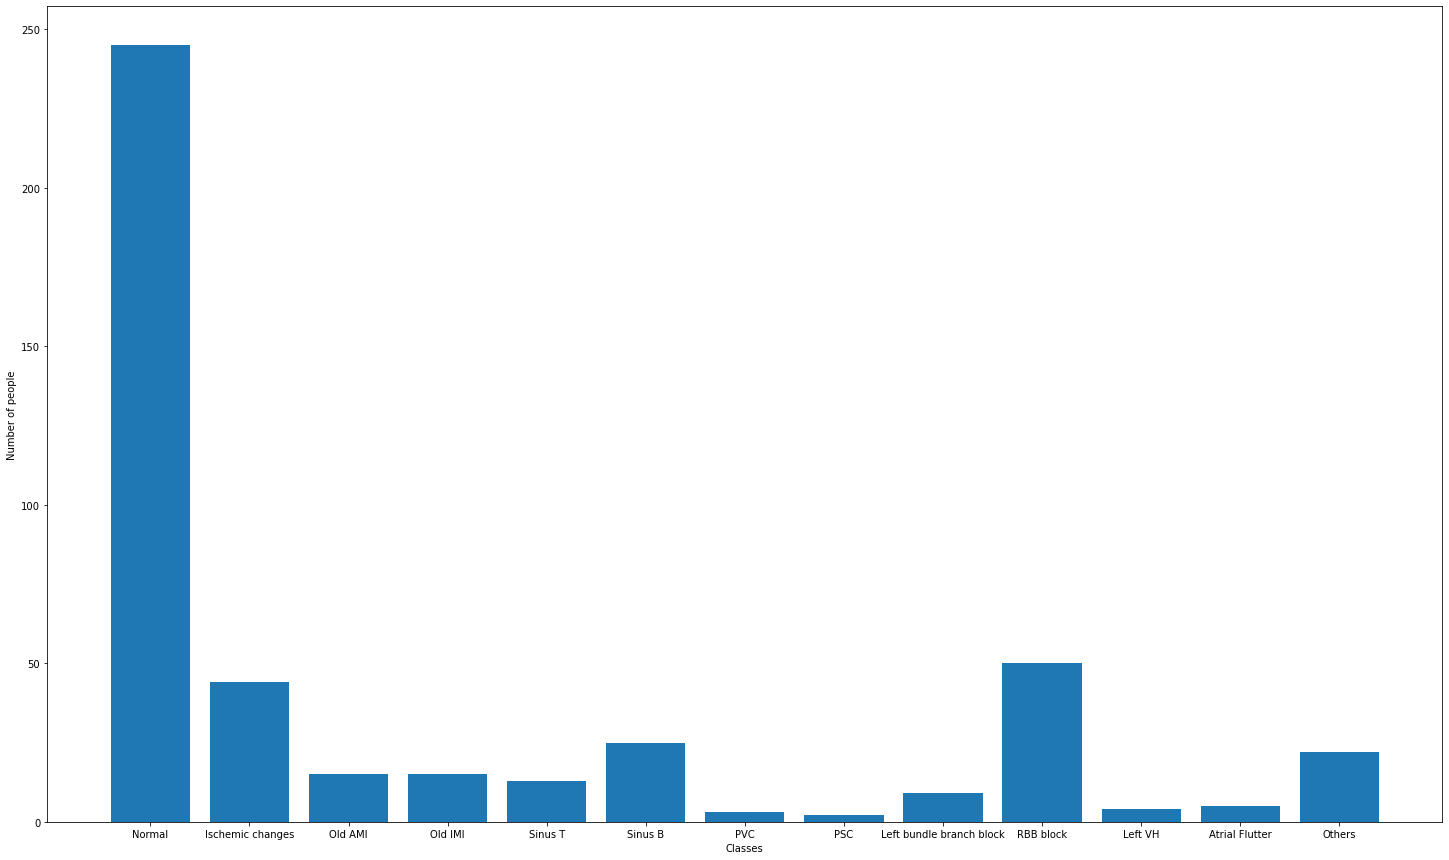

In [12]:
plt.figure(figsize=(25, 15))
plt.bar(Distributions2["Classe"], Distributions2["Count"])
plt.xlabel("Classes")
plt.ylabel("Number of people")

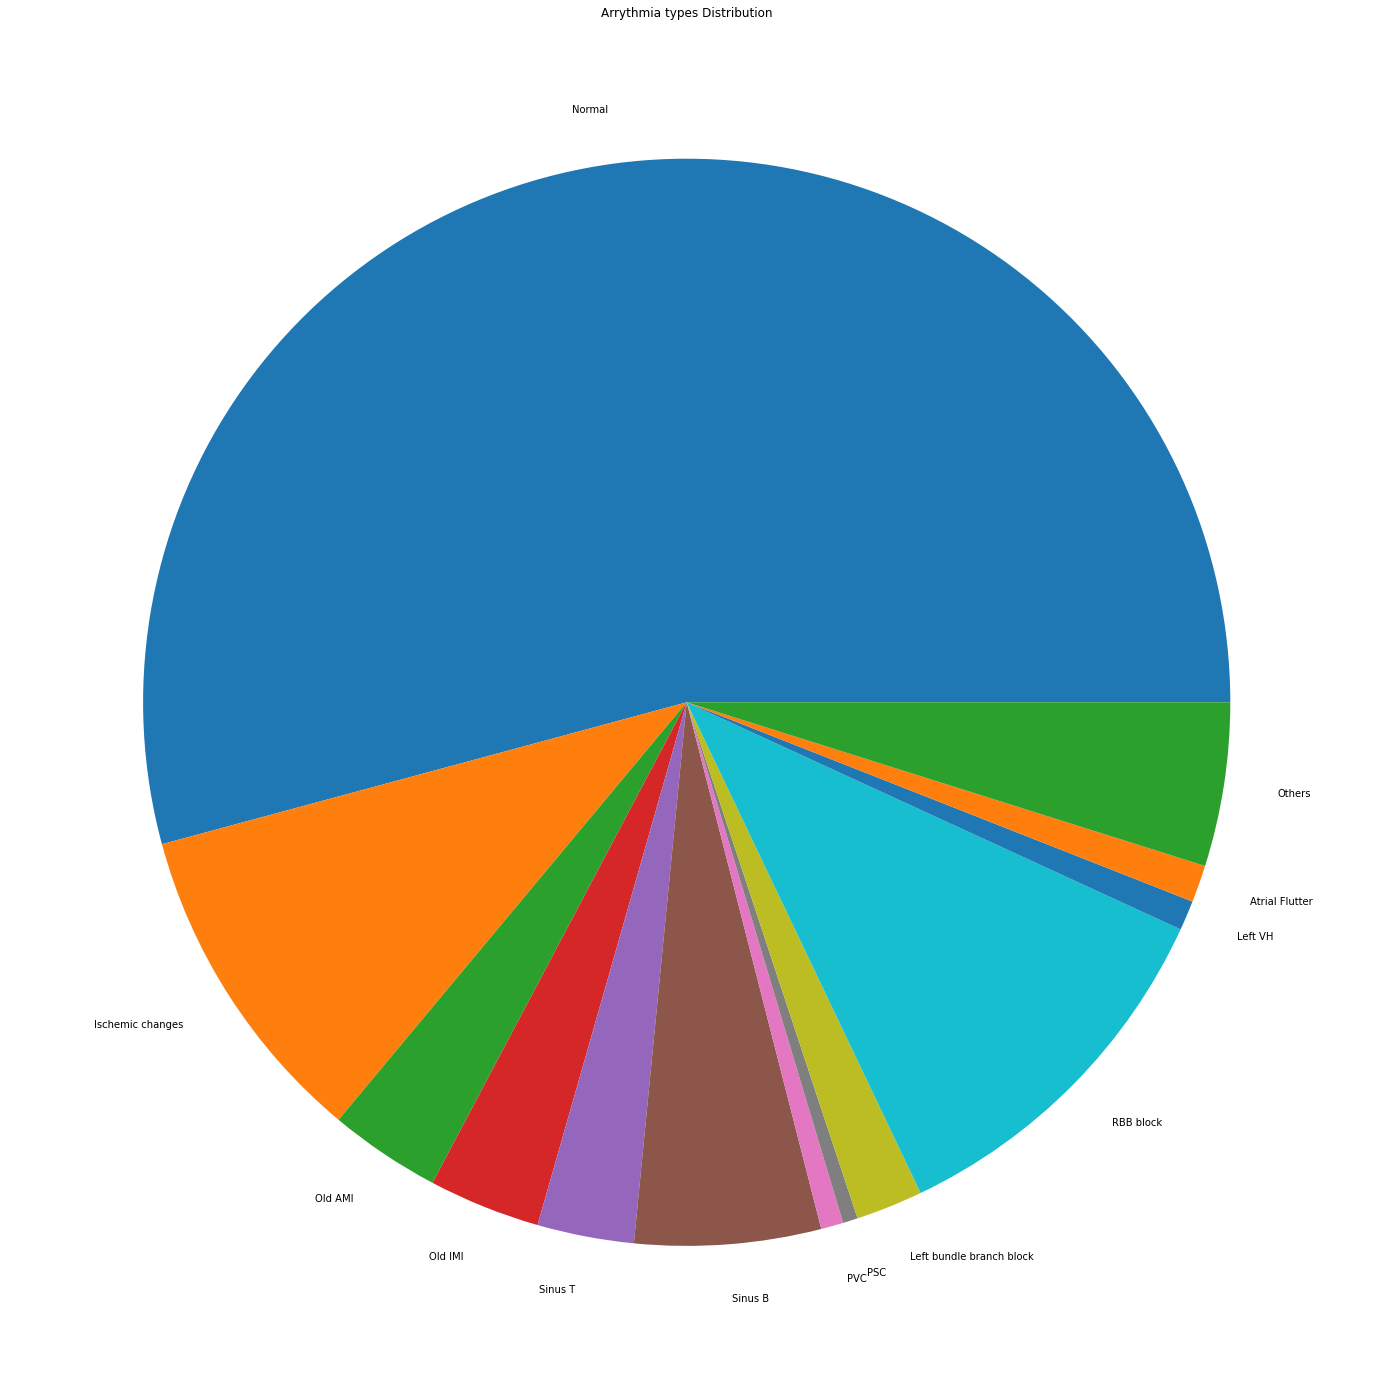

In [13]:
plt.figure(figsize=(25, 25))
plt.pie(Distributions2["Count"], labels = Distributions2["Classe"])
plt.title("Arrythmia types Distribution")
plt.show()

## Data Frame Informations

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


## Making a copy 


In [15]:
new_df = df.copy()

# Preprocessing

## Missing values

In [16]:
missing = new_df.isna().sum().sum()
print(f' Total missing values : {missing}')

 Total missing values : 408


### Filling missing values 

for column in new_df.columns:
    new_df[column] = new_df[column].astype(float)
    new_df[column] = new_df[column].fillna(new_df[column].mean())

In [17]:
from sklearn.impute import SimpleImputer
cat_imputer_median = SimpleImputer(strategy='median')
cat_imputer_median.fit(new_df)
new_df = pd.DataFrame(cat_imputer_median.transform(new_df))


### Checking if there is any missing values left

In [18]:
missing = new_df.isna().sum().sum()
print(f' Total missing values : {missing}')

 Total missing values : 0


### Change column name to "label"
Because "class" is a keyword in python


In [19]:
new_df = new_df.rename(columns={279: 'label'})
new_df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,label
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1.0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10.0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2.0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1.0


## Saving Pre-processed data

In [20]:
preprocessed_data = new_df.copy()

### Split DataFrame


In [21]:
y = new_df['label']
x = new_df.drop(['label'], axis=1)

### Data features

In [22]:
x

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


### Standarisation


In [23]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
x1 = pd.DataFrame(x1, index=x.index, columns=x.columns)
x1

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,1.734439,-1.107520,0.641327,0.713814,0.135505,0.844945,0.113709,0.113809,1.201469,-1.094661,...,0.004037,0.508843,-0.013839,0.278621,-0.079546,0.0,1.109553,1.177737,0.294603,1.078670
1,0.579312,0.902918,-0.031998,-0.251644,-0.516072,0.420769,1.013301,-0.588564,-1.977064,-0.191203,...,-0.327703,0.508843,-0.157972,0.728573,-0.079546,0.0,-0.906889,0.616126,0.079613,0.504874
2,0.457720,-1.107520,0.156533,1.618932,3.197915,0.175193,0.563505,0.422853,0.464980,1.373324,...,1.994474,0.508843,0.130294,-0.471299,-0.079546,0.0,-0.618826,1.528744,-0.520878,1.057018
3,0.518516,-1.107520,0.237332,1.558590,0.721924,1.045871,0.383587,0.254284,2.054247,-0.125096,...,0.667516,0.508843,0.908612,-0.371310,-0.079546,0.0,-0.330763,0.967133,1.132324,1.739077
4,1.734439,-1.107520,0.641327,0.713814,-0.059968,0.577044,-0.216141,0.198094,0.503742,-1.094661,...,-0.161833,0.508843,1.168051,-1.071235,-0.079546,0.0,-1.771079,1.879751,0.450286,1.804035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.396924,0.902918,-0.166663,0.110403,-0.581229,0.978896,0.443560,-0.448089,1.046419,-1.557409,...,0.501646,0.508843,-1.368689,-1.771161,-0.079546,0.0,0.533427,-0.436895,-1.758926,-1.622502
448,-0.575815,-1.107520,0.641327,1.015520,0.721924,-0.405260,-0.186154,0.872372,-0.659136,1.152968,...,-0.327703,0.508843,1.888716,-0.071342,-0.079546,0.0,-0.330763,0.826730,1.384382,1.782383
449,-0.636611,-1.107520,-0.005065,-0.010279,1.243185,0.465419,-0.066209,0.675708,1.007656,-2.615116,...,2.492083,0.508843,2.090502,-13.569901,-0.079546,0.0,2.837932,-0.156089,-4.709483,-3.392610
450,-0.879796,0.902918,-0.301328,-0.794714,0.265820,-1.097337,0.563505,1.349985,-1.046762,0.447829,...,0.833385,-0.220727,0.850959,0.378610,-0.079546,0.0,-0.042700,0.826730,0.420632,0.927101


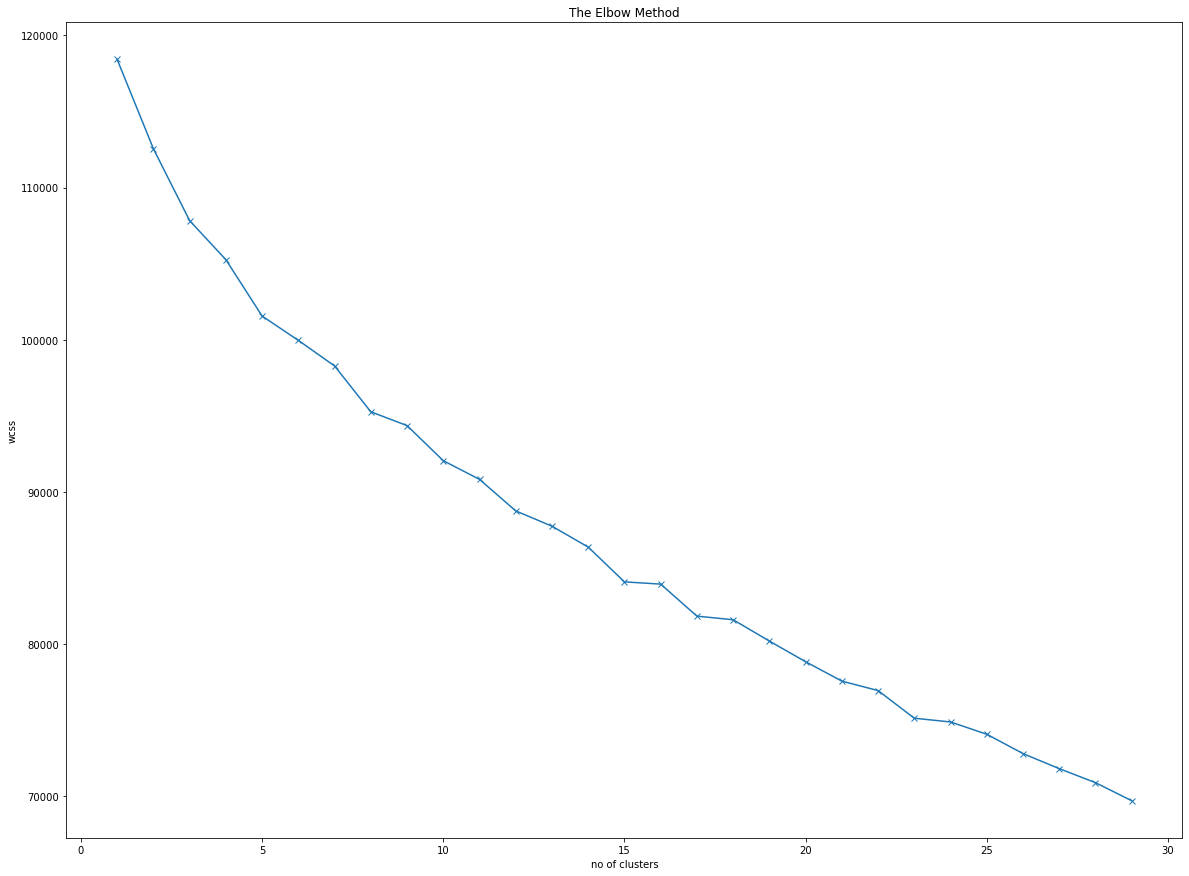

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20, 15))
plt.plot(range(1,30), wcss, marker='x')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Can't use the Elbow method because we're using more than 10 clusters, therefore this method won't be accurate

# Clustering

## Preprocessing results for clustering
Converting our 279 columns to only 2 columns for easy clustering and visualization

### Setting up the  PCA function


In [25]:
pca = PCA(n_components=2)

### Converting Data using PCA


In [26]:
x_reduced = pca.fit_transform(x1)

Converting PCA output to a Data Frame

In [27]:
x_reduced2 = pd.DataFrame(pca.fit_transform(x1), index=x1.index, columns=["attr1", "attr2"])
x_reduced2

,attr1,attr2
0,1.352680,-0.007800
1,-0.017526,1.316788
2,-5.099891,-10.348640
3,0.099043,2.262753
4,1.604064,-1.359202
...,...,...
447,8.188724,-2.526460
448,-7.767614,1.473442
449,17.793299,-16.946336
450,-3.131459,2.645951


## Before Clustering

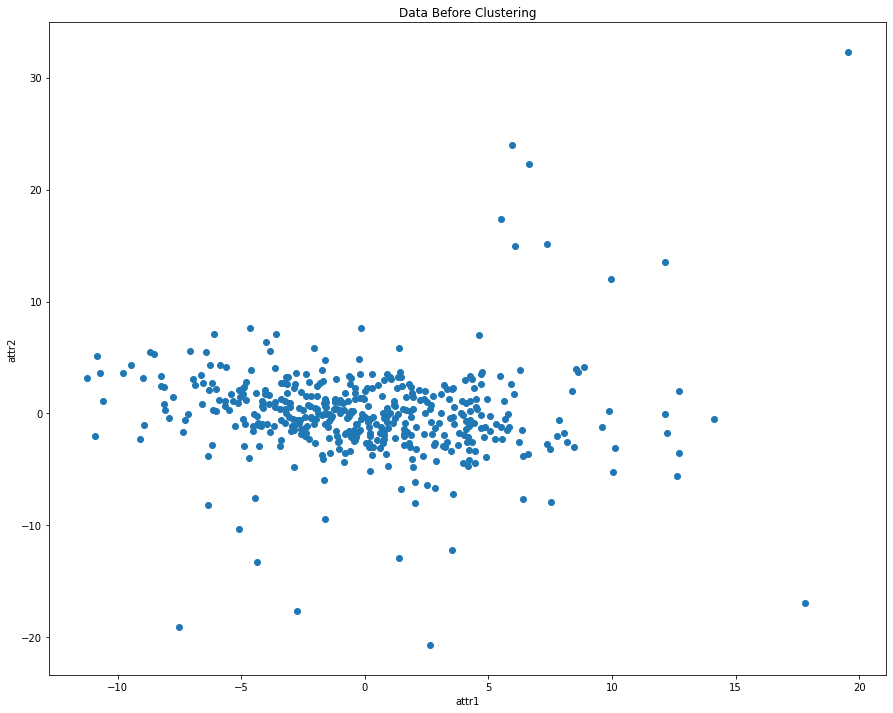

In [28]:
plt.figure(figsize=(15, 12))
plt.scatter(x_reduced2['attr1'], x_reduced2['attr2'])
plt.xlabel("attr1")
plt.ylabel("attr2")
plt.title('Data Before Clustering')
plt.show()

## Clustering

In [29]:
kmeans = KMeans(n_clusters=16, init='random', n_init=30)
kmeans.fit(x_reduced)
y_km = kmeans.fit_predict(x_reduced)

## Cluster centers

In [30]:
centroids = kmeans.cluster_centers_
centroids

array([[  5.66760535,   2.94055934],
       [ -7.02233856,  -3.1015165 ],
       [ -4.65675861,   1.03158694],
       [ -2.40200482,   4.01881627],
       [  6.33366009, -15.67593835],
       [ -4.92732216, -15.09334355],
       [  7.66035223,  17.05409122],
       [ -1.17597098,   0.70891898],
       [ -7.99119182,   3.51064229],
       [  2.60955894,  -5.8214929 ],
       [  1.89998582,   1.73614622],
       [ -2.87927175,  -1.41460853],
       [ 10.08378733,  -2.03526174],
       [  4.32151585,  -1.5689826 ],
       [  0.31066352,  -1.87240639],
       [ 19.55945974,  32.27953834]])

## Getting Clustering results


In [31]:
cluster_labels = kmeans.labels_
cluster_labels

array([10,  7,  5, 10, 14,  1,  7, 14, 14, 11, 14,  9, 13,  8,  8,  7, 11,
       10,  7, 10, 11, 11, 11, 10,  3,  0,  8, 14,  0, 12, 13, 13,  7, 10,
       14,  7, 14, 11, 10, 12, 14, 14, 11,  8, 13, 13, 14, 10,  7,  0, 13,
       14, 14,  8,  7,  3,  3, 10,  7,  2,  9, 14, 11,  2,  8, 14, 13,  2,
        3, 13,  3,  7,  2, 13,  2,  1,  9, 14,  2,  7,  3,  2, 10, 14,  3,
        6,  8,  2,  6,  6, 13, 10, 13, 13,  9, 14, 14,  7, 13, 10, 14,  8,
        9,  8,  7, 10, 10, 11,  8,  3, 10, 11, 14,  1,  7, 14,  7, 13, 13,
        7, 10, 13, 12, 14, 14, 11, 13,  7, 10,  0, 11,  7,  2,  1, 11,  8,
        8, 14, 11, 14,  8,  4, 13,  2, 14, 14,  1, 14, 14, 11, 11,  7,  9,
        7,  2,  7,  7, 11,  3, 13,  2,  0,  2, 14,  2,  7, 13,  7, 14,  7,
       10, 12,  7,  7,  7, 13,  2, 11, 10,  0,  2,  7, 13,  7, 12, 14,  7,
       14, 10,  6, 13,  7, 10,  3,  7, 14,  8, 14,  1,  3, 13, 10,  0, 11,
       10,  2, 13,  6,  8,  2,  1,  9, 13,  8, 14, 14,  7, 13,  9,  7, 14,
       13,  2, 11, 14, 10

## Original Clusters vs K-means Clusters

In [32]:
# Concatinating the 2D features with original labels and the clustering results
x_reduced2 = pd.concat([x_reduced2, y, pd.Series(cluster_labels, name='cluster')], axis=1)
x_reduced2["label"] = x_reduced2["label"].astype(int)
x_reduced2

,attr1,attr2,label,cluster
0,1.352680,-0.007800,8,10
1,-0.017526,1.316788,6,7
2,-5.099891,-10.348640,10,5
3,0.099043,2.262753,1,10
4,1.604064,-1.359202,7,14
...,...,...,...,...
447,8.188724,-2.526460,1,12
448,-7.767614,1.473442,10,8
449,17.793299,-16.946336,2,4
450,-3.131459,2.645951,1,3


## Data after clustering

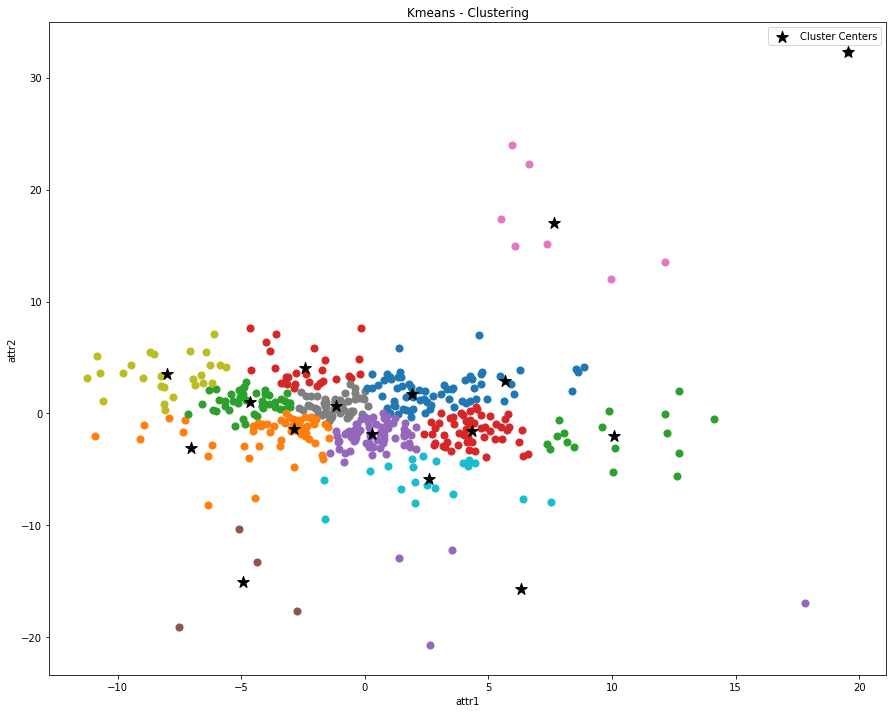

In [33]:
def clustering_plotter():
    plt.figure(figsize=(15, 12))
    plt.scatter(x_reduced[y_km == 0, 0], x_reduced[y_km == 0, 1], s=50)
    plt.scatter(x_reduced[y_km == 1, 0], x_reduced[y_km == 1, 1], s=50)
    plt.scatter(x_reduced[y_km == 2, 0], x_reduced[y_km == 2, 1], s=50)
    plt.scatter(x_reduced[y_km == 3, 0], x_reduced[y_km == 3, 1], s=50)
    plt.scatter(x_reduced[y_km == 4, 0], x_reduced[y_km == 4, 1], s=50)
    plt.scatter(x_reduced[y_km == 5, 0], x_reduced[y_km == 5, 1], s=50)
    plt.scatter(x_reduced[y_km == 6, 0], x_reduced[y_km == 6, 1], s=50)
    plt.scatter(x_reduced[y_km == 7, 0], x_reduced[y_km == 7, 1], s=50)
    plt.scatter(x_reduced[y_km == 8, 0], x_reduced[y_km == 8, 1], s=50)
    plt.scatter(x_reduced[y_km == 9, 0], x_reduced[y_km == 9, 1], s=50)
    plt.scatter(x_reduced[y_km == 10, 0], x_reduced[y_km == 10, 1], s=50)
    plt.scatter(x_reduced[y_km == 11, 0], x_reduced[y_km == 11, 1], s=50)
    plt.scatter(x_reduced[y_km == 12, 0], x_reduced[y_km == 12, 1], s=50)
    plt.scatter(x_reduced[y_km == 13, 0], x_reduced[y_km == 13, 1], s=50)
    plt.scatter(x_reduced[y_km == 14, 0], x_reduced[y_km == 14, 1], s=50)
    plt.scatter(x_reduced[y_km == 15, 0], x_reduced[y_km == 15, 1], s=50)

    plt.scatter(centroids[:, 0], centroids[:, 1],marker="*", color="black",s=150, label='Cluster Centers')
    plt.xlabel("attr1")
    plt.ylabel("attr2")
    plt.title('Kmeans - Clustering')
    plt.legend()
    plt.show()
clustering_plotter()

## Number of clusters attributes

In [34]:
Distribution2 = x_reduced2["cluster"].value_counts()
Distribution_names = []
Distribution_counts = []
classes = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8", "Cluster 9", "Cluster 10", "Cluster 11", "Cluster 12", "Cluster 13", "Cluster 14", "Cluster 15"]
for item in range(len(classes)):
    Distribution_names.append(classes[item])
    if item in Distribution2:      
        Distribution_counts.append(Distribution2[item])
    else:
        Distribution_counts.append(0)
Distributions2 = {'Classe':Distribution_names,'Count':Distribution_counts}
Distributions2 = pd.DataFrame(Distributions2)
Distribution2

14    68
7     54
13    53
10    49
2     45
11    44
3     28
8     26
9     20
0     20
12    17
1     12
6      7
5      4
4      4
15     1
Name: cluster, dtype: int64

## Plotting K-means clusters

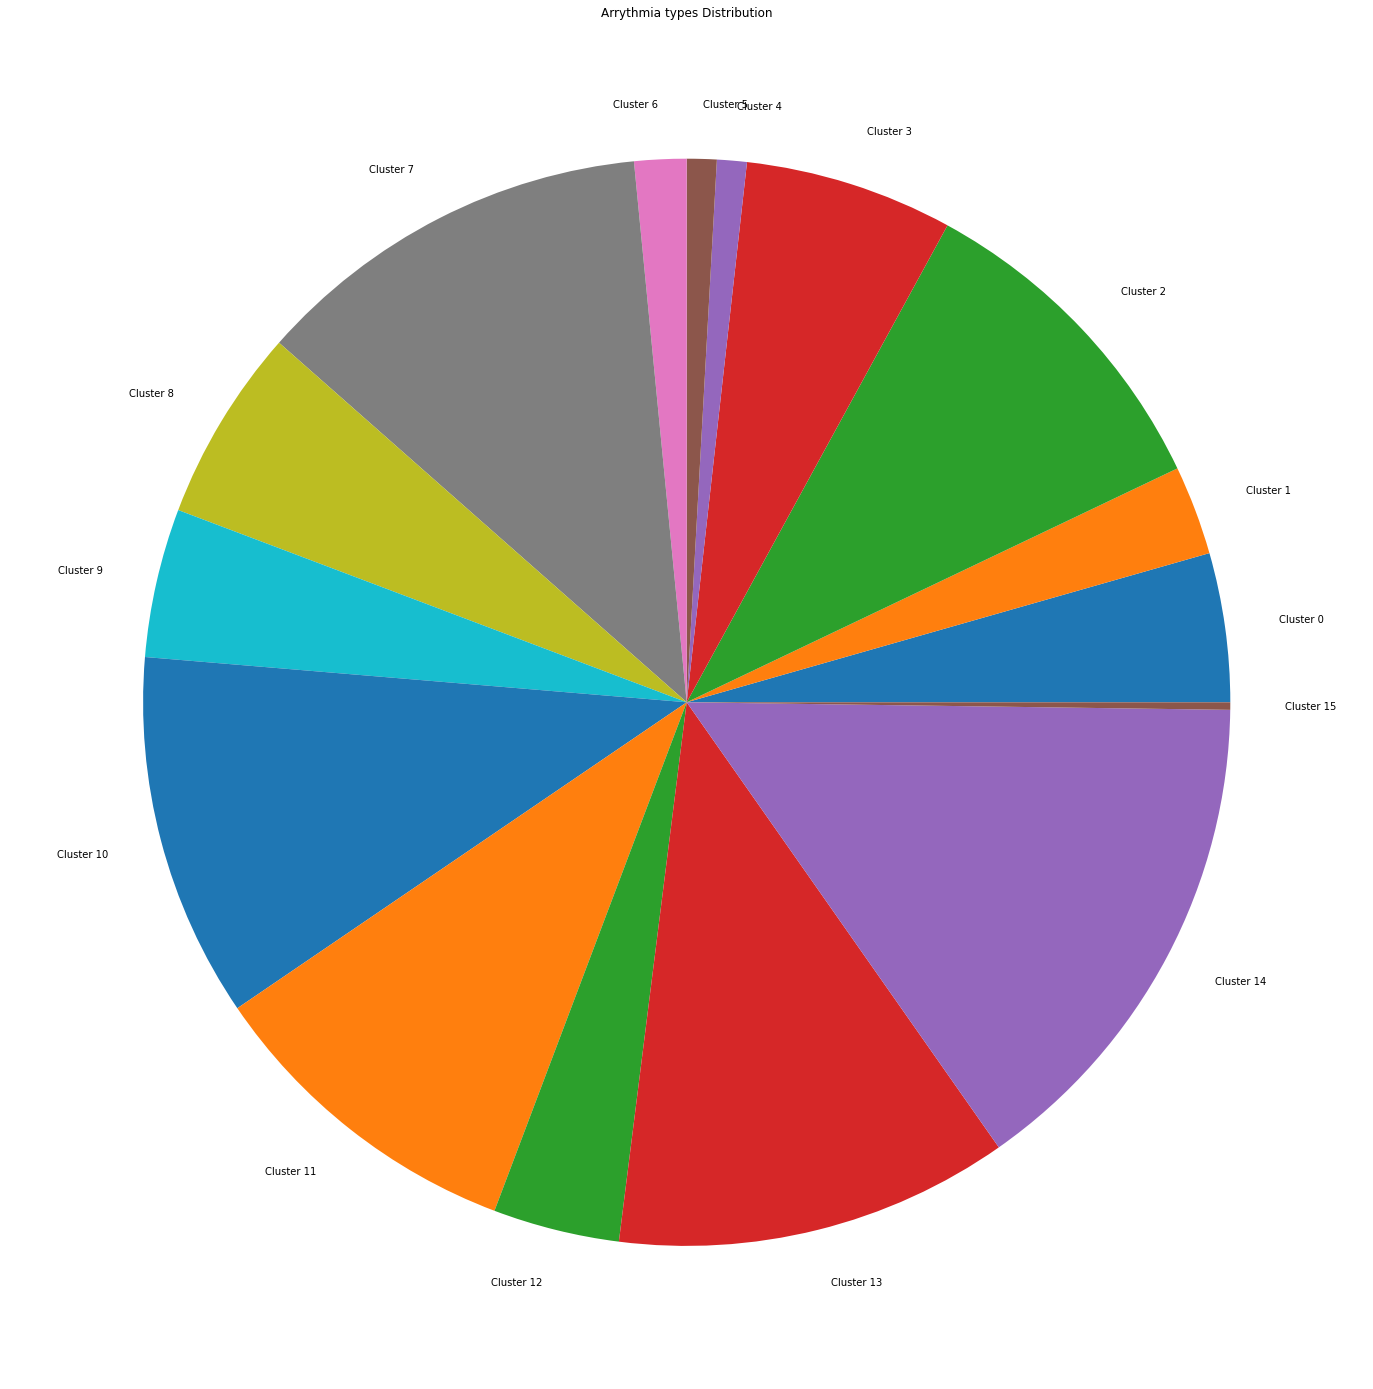

In [35]:
plt.figure(figsize=(25, 25))
plt.pie(Distributions2["Count"], labels = Distributions2["Classe"])
plt.title("Arrythmia types Distribution")
plt.show()

# Clustering 30 times

In [36]:
from sklearn.metrics import rand_score

n_iter = 30
S_scores = []
R_scores = []

original_labels = x_reduced2.copy()

for i in range(n_iter):
    kmeans = KMeans(n_clusters=16, init='random', )
    kmeans.fit(x1)
    s_score = silhouette_score(x1, kmeans.labels_, metric='euclidean')
    S_scores.append(s_score)
    r_score = rand_score(original_labels['label'], kmeans.labels_)
    R_scores.append(r_score)

    
results = {'Silhouette score':S_scores,'Rand index':R_scores}

## Clustering results

In [37]:
results_df = pd.DataFrame(results)
results_df

,Silhouette score,Rand index
0,0.002315,0.651149
1,0.022615,0.643074
2,0.006030,0.646391
3,0.015287,0.662461
4,0.024533,0.635069
5,0.006346,0.644075
6,0.027544,0.640661
7,0.010786,0.648461
8,-0.000057,0.663835
9,0.003733,0.652297


## Analysing results

In [38]:
kmeans_results = results_df.describe()
kmeans_results = kmeans_results.drop(["count", "25%", "50%", "75%"])
kmeans_results

,Silhouette score,Rand index
mean,0.006612,0.652579
std,0.011865,0.007564
min,-0.020617,0.635069
max,0.027544,0.665669


## Using previous preprocessed data

In [39]:
preprocessed_data

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,label
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1.0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10.0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2.0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1.0


## Splitting data to Features | Target

In [40]:
X = preprocessed_data.drop("label", axis=1)
Y = preprocessed_data['label']

## Features

In [41]:
X

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


## Target

In [42]:
Y

0       8.0
1       6.0
2      10.0
3       1.0
4       7.0
       ... 
447     1.0
448    10.0
449     2.0
450     1.0
451     1.0
Name: label, Length: 452, dtype: float64

## Data standarisation

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Testing KNN without features selection

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", round(KNeighborsClassifierScore*100, 2), "%")

Accuracy obtained by K Neighbors Classifier : 53.85 %


## Feature selection using ANOVA | Mutual info classif

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

### Configure to select all features

In [47]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')

### learn relationship from training data


In [48]:
fs.fit(X_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000001DFE4E8CCA0>)

### transform train and test input data

In [49]:
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

### Features scores

In [50]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.101955
Feature 1: 0.032285
Feature 2: 0.055766
Feature 3: 0.067421
Feature 4: 0.155929
Feature 5: 0.048211
Feature 6: 0.104643
Feature 7: 0.148173
Feature 8: 0.047063
Feature 9: 0.040414
Feature 10: 0.194234
Feature 11: 0.035414
Feature 12: 0.120475
Feature 13: 0.178291
Feature 14: 0.251548
Feature 15: 0.112990
Feature 16: 0.126745
Feature 17: 0.083631
Feature 18: 0.104472
Feature 19: 0.000000
Feature 20: 0.117888
Feature 21: 0.000000
Feature 22: 0.122779
Feature 23: 0.126094
Feature 24: 0.081042
Feature 25: 0.057431
Feature 26: 0.069219
Feature 27: 0.157079
Feature 28: 0.053618
Feature 29: 0.126834
Feature 30: 0.013355
Feature 31: 0.109401
Feature 32: 0.098367
Feature 33: 0.098271
Feature 34: 0.128989
Feature 35: 0.080503
Feature 36: 0.092109
Feature 37: 0.087472
Feature 38: 0.172641
Feature 39: 0.164753
Feature 40: 0.000000
Feature 41: 0.123488
Feature 42: 0.099630
Feature 43: 0.198348
Feature 44: 0.043460
Feature 45: 0.029042
Feature 46: 0.163004
Feature 47: 0.104832
Fe

### plot the scores

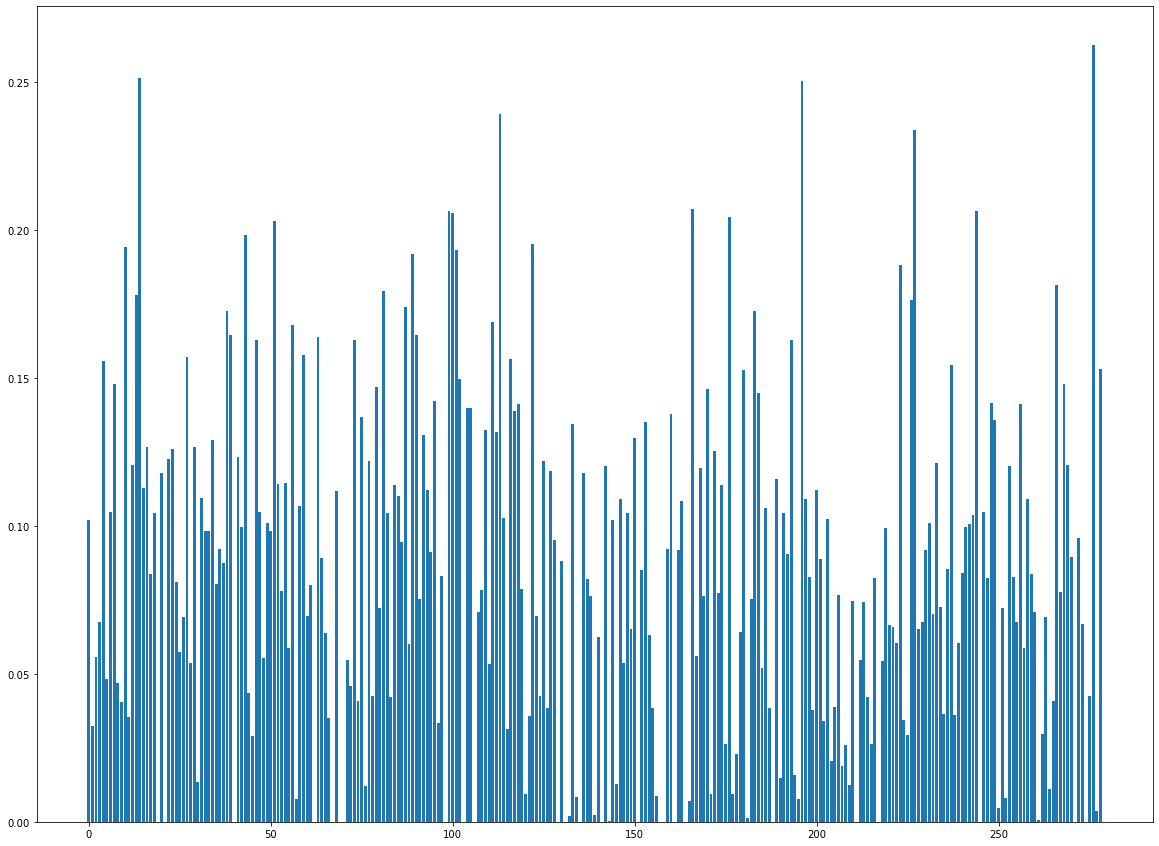

In [51]:
# plot the scores
plt.figure(figsize=(20, 15))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Bad features

In [52]:
bad_features = []
for i in range(len(fs.scores_)):
    if fs.scores_[i] <= 0.15:
        bad_features.append(i)
print(bad_features) 

[0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 88, 91, 92, 93, 94, 95, 96, 97, 98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253,

### Features selection stats

In [53]:
number_of_all_features = X.shape[1]
number_of_bad_features = len(bad_features)
number_of_minimum_features =  number_of_all_features - number_of_bad_features
print(f' Number of all features : {number_of_all_features} | Number of bad features selected as bad features : {number_of_bad_features} | Number of minimum features : {number_of_minimum_features}')

 Number of all features : 279 | Number of bad features selected as bad features : 240 | Number of minimum features : 39


### selecting a subset of features

In [54]:
fs = SelectKBest(score_func=f_classif, k=number_of_minimum_features)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [55]:
print(f'Training Data Before features selection : {X_train.shape[1]}')
print(f'Training Data After features selection : {X_train_fs.shape[1]}')

Training Data Before features selection : 279
Training Data After features selection : 39


### KNN Accuracy : without features selection vs with features selection

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_fs, y_train)
KNeighborsClassifierScore_fs = knn.score(X_test_fs, y_test)
print("Accuracy obtained by K Neighbors Classifier :", round(KNeighborsClassifierScore*100, 2), "%")
print("Accuracy obtained by K Neighbors Classifier with features selection :", round(KNeighborsClassifierScore_fs*100, 2), "%")

Accuracy obtained by K Neighbors Classifier : 53.85 %
Accuracy obtained by K Neighbors Classifier with features selection : 70.33 %


As we see, it's better to use features selection  

## Setting up a Visualization DataFrame

In [57]:
x_test_plt = np.array(X_test_fs)
y_test_plt = np.array(y_test)
x_test_plt = pd.DataFrame(x_test_plt)
y_test_plt = pd.DataFrame(y_test_plt)
x_test_plt_reduced = pd.DataFrame(pca.fit_transform(x_test_plt), index=x_test_plt.index, columns=["attr1", "attr2"])
x_test_plt_reduced = pd.concat([x_test_plt_reduced, y_test_plt], axis=1)
x_test_plt_reduced = x_test_plt_reduced.copy()
x_test_plt_reduced = x_test_plt_reduced.rename(columns={0 : 'label'})

In [58]:
def classification_plotter(pred):    
    x_test_plt_reduced_knn = pd.concat([x_test_plt_reduced, pd.Series(pred, name='cluster')], axis=1)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(x_test_plt_reduced['attr1'], x_test_plt_reduced['attr2'], s=50)
    plt.xlabel("attr1")
    plt.ylabel("attr2")
    plt.title('Data Before Classification')
    plt.show()

    cluster_1_examples = x_test_plt_reduced_knn.query("label == 1")
    cluster_2_examples = x_test_plt_reduced_knn.query("label == 2")
    cluster_3_examples = x_test_plt_reduced_knn.query("label == 3")
    cluster_4_examples = x_test_plt_reduced_knn.query("label == 4")
    cluster_5_examples = x_test_plt_reduced_knn.query("label == 5")
    cluster_6_examples = x_test_plt_reduced_knn.query("label == 6")
    cluster_7_examples = x_test_plt_reduced_knn.query("label == 7")
    cluster_8_examples = x_test_plt_reduced_knn.query("label == 8")
    cluster_9_examples = x_test_plt_reduced_knn.query("label == 9")
    cluster_10_examples = x_test_plt_reduced_knn.query("label == 10")
    cluster_11_examples = x_test_plt_reduced_knn.query("label == 11")
    cluster_12_examples = x_test_plt_reduced_knn.query("label == 12")
    cluster_13_examples = x_test_plt_reduced_knn.query("label == 13")
    cluster_14_examples = x_test_plt_reduced_knn.query("label == 14")
    cluster_15_examples = x_test_plt_reduced_knn.query("label == 15")
    cluster_16_examples = x_test_plt_reduced_knn.query("label == 16")
    plt.figure(figsize=(10, 8))
    plt.scatter(cluster_1_examples['attr1'], cluster_1_examples['attr2'], c="red", s=20, label="Normal")
    plt.scatter(cluster_2_examples['attr1'], cluster_2_examples['attr2'], c="maroon",s=20, label="Ischemic changes")
    plt.scatter(cluster_3_examples['attr1'], cluster_3_examples['attr2'], c="lightsalmon",s=20, label="Old AMI")
    plt.scatter(cluster_4_examples['attr1'], cluster_4_examples['attr2'], c="peru",s=20, label="Old IMI")
    plt.scatter(cluster_5_examples['attr1'], cluster_5_examples['attr2'], c="darkorange",s=20, label="Sinus T")
    plt.scatter(cluster_6_examples['attr1'], cluster_6_examples['attr2'], c="gold",s=20, label="Sinus B")
    plt.scatter(cluster_7_examples['attr1'], cluster_7_examples['attr2'], c="olive",s=20, label="PVC")
    plt.scatter(cluster_8_examples['attr1'], cluster_8_examples['attr2'], c="yellow",s=20, label="PSC")
    plt.scatter(cluster_9_examples['attr1'], cluster_9_examples['attr2'], c="lawngreen",s=20, label="Left bundle branch block")
    plt.scatter(cluster_10_examples['attr1'], cluster_10_examples['attr2'], c="deepskyblue",s=20, label="RBB block")
    plt.scatter(cluster_11_examples['attr1'], cluster_11_examples['attr2'], c="navy",s=20, label="1. degree AV block")
    plt.scatter(cluster_12_examples['attr1'], cluster_12_examples['attr2'], c="black",s=20, label="2. degree AV block")
    plt.scatter(cluster_13_examples['attr1'], cluster_13_examples['attr2'], c="m",s=20, label="3. degree AV block")
    plt.scatter(cluster_14_examples['attr1'], cluster_14_examples['attr2'], c="pink",s=20, label="Left VH")
    plt.scatter(cluster_15_examples['attr1'], cluster_15_examples['attr2'], c="indigo",s=20, label="Atrial Flutter")
    plt.scatter(cluster_16_examples['attr1'], cluster_16_examples['attr2'], c="grey",s=20, label="Others")
    plt.xlabel("attr1")
    plt.ylabel("attr2")
    plt.title('Data with original Classification')
    plt.legend()
    plt.show()
    
    
    cluster_1_examples = x_test_plt_reduced_knn.query("cluster == 1")
    cluster_2_examples = x_test_plt_reduced_knn.query("cluster == 2")
    cluster_3_examples = x_test_plt_reduced_knn.query("cluster == 3")
    cluster_4_examples = x_test_plt_reduced_knn.query("cluster == 4")
    cluster_5_examples = x_test_plt_reduced_knn.query("cluster == 5")
    cluster_6_examples = x_test_plt_reduced_knn.query("cluster == 6")
    cluster_7_examples = x_test_plt_reduced_knn.query("cluster == 7")
    cluster_8_examples = x_test_plt_reduced_knn.query("cluster == 8")
    cluster_9_examples = x_test_plt_reduced_knn.query("cluster == 9")
    cluster_10_examples = x_test_plt_reduced_knn.query("cluster == 10")
    cluster_11_examples = x_test_plt_reduced_knn.query("cluster == 11")
    cluster_12_examples = x_test_plt_reduced_knn.query("cluster == 12")
    cluster_13_examples = x_test_plt_reduced_knn.query("cluster == 13")
    cluster_14_examples = x_test_plt_reduced_knn.query("cluster == 14")
    cluster_15_examples = x_test_plt_reduced_knn.query("cluster == 15")
    cluster_16_examples = x_test_plt_reduced_knn.query("cluster == 16")
    plt.figure(figsize=(10, 8))
    plt.scatter(cluster_1_examples['attr1'], cluster_1_examples['attr2'], c="red", s=20, label="Normal")
    plt.scatter(cluster_2_examples['attr1'], cluster_2_examples['attr2'], c="maroon",s=20, label="Ischemic changes")
    plt.scatter(cluster_3_examples['attr1'], cluster_3_examples['attr2'], c="lightsalmon",s=20, label="Old AMI")
    plt.scatter(cluster_4_examples['attr1'], cluster_4_examples['attr2'], c="peru",s=20, label="Old IMI")
    plt.scatter(cluster_5_examples['attr1'], cluster_5_examples['attr2'], c="darkorange",s=20, label="Sinus T")
    plt.scatter(cluster_6_examples['attr1'], cluster_6_examples['attr2'], c="gold",s=20, label="Sinus B")
    plt.scatter(cluster_7_examples['attr1'], cluster_7_examples['attr2'], c="olive",s=20, label="PVC")
    plt.scatter(cluster_8_examples['attr1'], cluster_8_examples['attr2'], c="yellow",s=20, label="PSC")
    plt.scatter(cluster_9_examples['attr1'], cluster_9_examples['attr2'], c="lawngreen",s=20, label="Left bundle branch block")
    plt.scatter(cluster_10_examples['attr1'], cluster_10_examples['attr2'], c="deepskyblue",s=20, label="RBB block")
    plt.scatter(cluster_11_examples['attr1'], cluster_11_examples['attr2'], c="navy",s=20, label="1. degree AV block")
    plt.scatter(cluster_12_examples['attr1'], cluster_12_examples['attr2'], c="black",s=20, label="2. degree AV block")
    plt.scatter(cluster_13_examples['attr1'], cluster_13_examples['attr2'], c="m",s=20, label="3. degree AV block")
    plt.scatter(cluster_14_examples['attr1'], cluster_14_examples['attr2'], c="pink",s=20, label="Left VH")
    plt.scatter(cluster_15_examples['attr1'], cluster_15_examples['attr2'], c="indigo",s=20, label="Atrial Flutter")
    plt.scatter(cluster_16_examples['attr1'], cluster_16_examples['attr2'], c="grey",s=20, label="Others")
    plt.xlabel("attr1")
    plt.ylabel("attr2")
    plt.title('Data After Classification')
    plt.legend()
    plt.show()

## KNN

## Using train test split


### Setting up the model

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## Training

In [60]:
knn.fit(X_train_fs, y_train)

KNeighborsClassifier()

## Classification results

In [61]:
predictions_knn = knn.predict(X_test_fs)
predictions_knn

array([ 1.,  6.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  4.,  1.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  3.,  3.,
        1.,  1., 10., 10., 10.,  2.,  1.,  1.,  1.,  3., 10.,  1.,  1.,
        1.,  1.,  1.,  6.,  1.,  2., 10.,  1.,  1.,  6.,  1.,  1.,  1.,
        1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 10.,
        1.,  1.,  1., 10.,  1.,  3.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,
       10.,  1.,  1.,  1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## Visualization

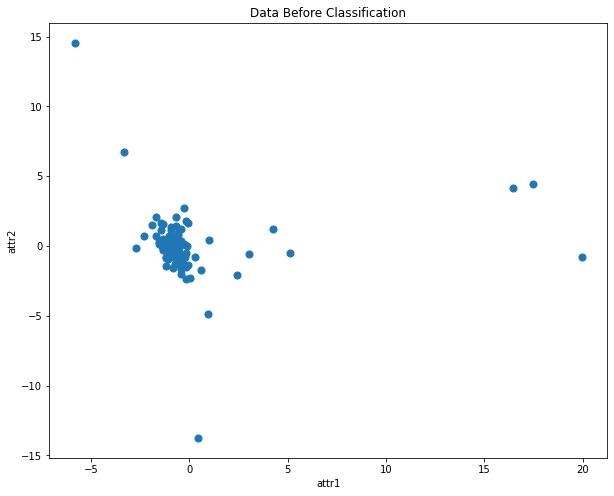

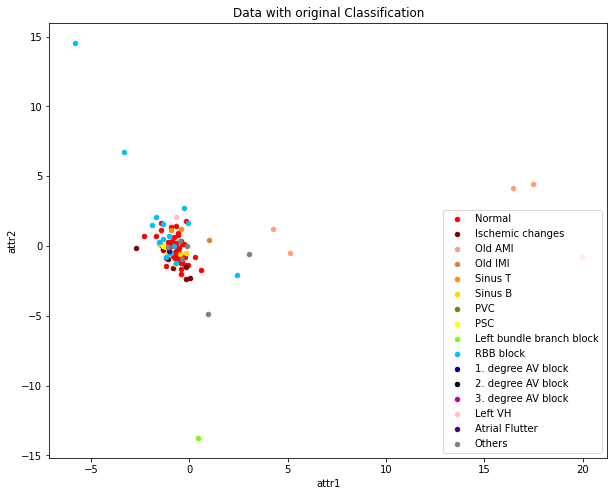

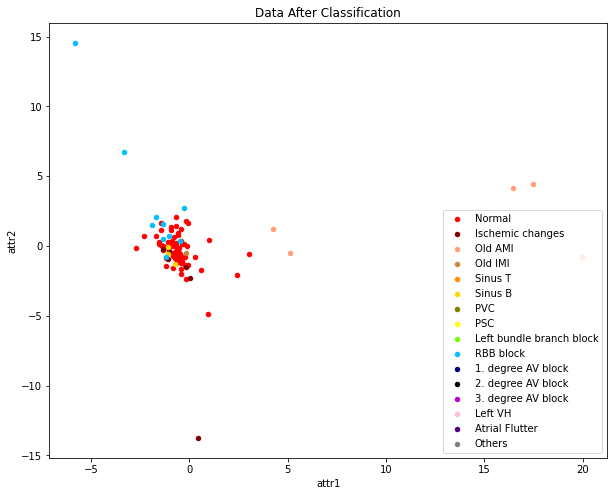

In [62]:
    classification_plotter(predictions_knn)

## Accuracy

In [63]:
KNeighborsClassifierScore_fs = knn.score(X_test_fs, y_test)
print("Accuracy obtained by K Neighbors Classifier :", round(KNeighborsClassifierScore_fs*100, 2), "%")

Accuracy obtained by K Neighbors Classifier : 70.33 %


## Model report

In [64]:
from sklearn.metrics import classification_report as report
y_pred_knn = knn.predict(X_test_fs)
print(report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.67      1.00      0.80        44
         2.0       0.67      0.57      0.62         7
         3.0       1.00      1.00      1.00         5
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.67      0.33      0.44         6
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        10.0       0.90      0.56      0.69        16
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         6

    accuracy                           0.70        91
   macro avg       0.32      0.29      0.30        91
weighted avg       0.63      0.70      0.64        91



## Model Accuracy | Precision | Recall

In [65]:
accknn=accuracy_score(y_test, y_pred_knn)*100
print("Accuracy of KNN : ", round(accknn, 2), "%")
precknn=precision_score(y_test,y_pred_knn, average='macro')*100
print("Precision of KNN : ",round(precknn, 2), "%")
recallknn=recall_score(y_test,y_pred_knn, average='micro')*100
print("Recall of KNN : ",round(recallknn, 2), "%")
f1knn=f1_score(y_test,y_pred_knn, average='weighted')*100
print("f1 score of KNN : ",round(f1knn, 2), "%")

Accuracy of KNN :  70.33 %
Precision of KNN :  32.5 %
Recall of KNN :  70.33 %
f1 score of KNN :  64.01 %


## Using Cross Validation kfold = 5

In [66]:
fs.fit(X, Y)
X = fs.transform(X)


## Packages

In [67]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

## Kfolds Scores

## Accuracy | Precision | Recall | F1 score  

In [68]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='micro'),
                 'f1': make_scorer(f1_score, average='weighted'),
                 }
scores = cross_validate(KNeighborsClassifier(), X, Y, cv = 5, scoring = custom_scorer)
test_accuracies = list(scores['test_accuracy'])
test_precisions = list(scores['test_precision'])
test_recalls = list(scores['test_recall'])
test_f1_scores = list(scores['test_f1'])
results_knn = {'Test Accuracies':test_accuracies,'test Precisions':test_precisions,'test Recalls':test_recalls,'test f1 scores':test_f1_scores}
results_knn = pd.DataFrame(results_knn)
results_knn

,Test Accuracies,test Precisions,test Recalls,test f1 scores
0,0.758242,0.503623,0.758242,0.700649
1,0.615385,0.335135,0.615385,0.534201
2,0.733333,0.498232,0.733333,0.672639
3,0.700000,0.489914,0.700000,0.661543
4,0.688889,0.507639,0.688889,0.625144


## Executing  30 Times

In [69]:
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='micro'),
                 'f1': make_scorer(f1_score, average='weighted'),
                }
    
for iter in range(30):
    preprocessed_data = preprocessed_data.sample(frac=1).reset_index(drop=True)
    
    X = preprocessed_data.drop("label", axis=1)
    Y = preprocessed_data['label']
    
    X = scaler.fit_transform(X)
    
    
    fs = SelectKBest(score_func=f_classif, k=number_of_minimum_features)
    fs.fit(X, Y)
    X = fs.transform(X)


    scores = cross_validate(KNeighborsClassifier(), X, Y, cv = 5, scoring = custom_scorer)
    accuracy_results.append(max(list(scores['test_accuracy'])))
    precision_results.append(max(list(scores['test_precision'])))
    recall_results.append(max(list(scores['test_recall'])))
    f1_results.append(max(list(scores['test_f1'])))
    
results_knn = {'accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1 score':f1_results}
results_knn = pd.DataFrame(results_knn)
results_knn

,accuracy,precision,recall,f1 score
0,0.722222,0.558351,0.722222,0.669287
1,0.733333,0.574636,0.733333,0.667514
2,0.766667,0.653172,0.766667,0.717122
3,0.714286,0.555176,0.714286,0.653474
4,0.744444,0.593546,0.744444,0.698174
5,0.733333,0.498557,0.733333,0.678902
6,0.744444,0.546419,0.744444,0.690736
7,0.733333,0.491865,0.733333,0.665880
8,0.733333,0.633429,0.733333,0.672435
9,0.736264,0.524531,0.736264,0.672730


## Analysing KNN results

In [70]:
results_knn = results_knn.describe()
results_knn = results_knn.drop(["count", "25%", "50%", "75%"])
results_knn

,accuracy,precision,recall,f1 score
mean,0.739662,0.568546,0.739662,0.685556
std,0.014665,0.046151,0.014665,0.017116
min,0.714286,0.491865,0.714286,0.653474
max,0.769231,0.657015,0.769231,0.717122


## DecisionTree

## Using Train Test Split

## Setting up the model

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

## Training

In [72]:
tree.fit(X_train_fs, y_train)

DecisionTreeClassifier()

## Classification results

In [73]:
predictions_dt = tree.predict(X_test_fs)
predictions_dt

array([ 1.,  6., 10.,  1., 16.,  1.,  1.,  1.,  3.,  6.,  1.,  1.,  1.,
        9., 15.,  6.,  4.,  5.,  1.,  2.,  2.,  1.,  5.,  5.,  3.,  3.,
        1.,  1., 10., 10.,  2.,  2., 16.,  1.,  1.,  3., 10.,  1.,  1.,
        1., 16.,  1.,  6.,  1.,  2., 10.,  1.,  1.,  1.,  1.,  1.,  1.,
       10.,  5.,  1.,  1.,  1.,  7.,  1.,  1.,  1.,  1., 10.,  1., 10.,
        1.,  2.,  1., 10.,  1.,  3.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,
       10.,  8.,  1.,  1., 10.,  1.,  1.,  1.,  1.,  1.,  5., 16.,  2.])

## Visualization

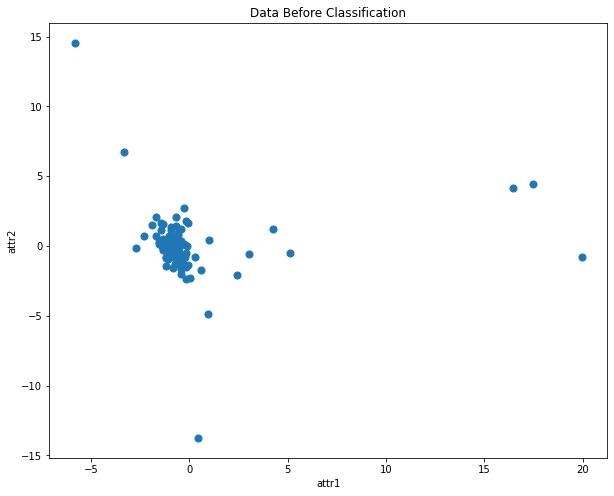

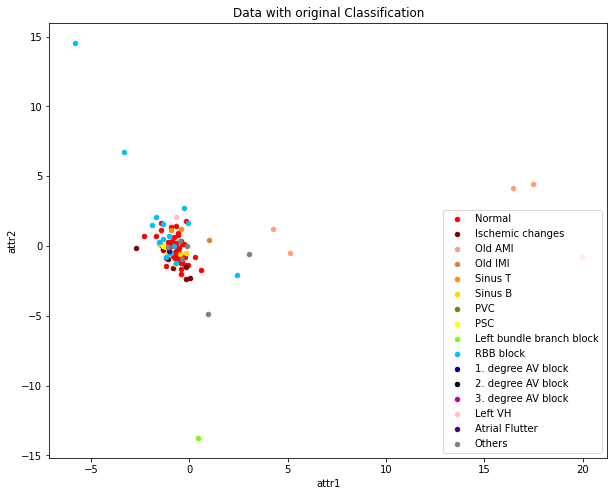

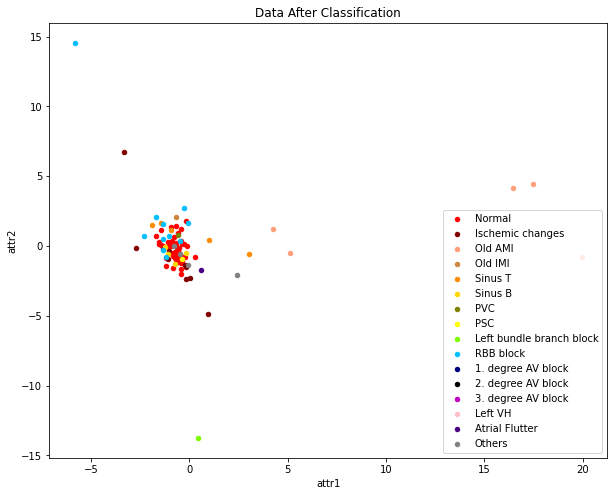

In [74]:
classification_plotter(predictions_dt)

## Accuarcy

In [75]:
DecisionTreeScore_fs = tree.score(X_test_fs, y_test)
print("Accuracy obtained by K Neighbors Classifier :", round(DecisionTreeScore_fs*100, 2), "%")

Accuracy obtained by K Neighbors Classifier : 68.13 %


## Report

In [76]:
y_pred_dt = tree.predict(X_test_fs)
print(report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         1.0       0.79      0.84      0.81        44
         2.0       0.60      0.86      0.71         7
         3.0       1.00      1.00      1.00         5
         4.0       0.00      0.00      0.00         1
         5.0       0.20      0.50      0.29         2
         6.0       1.00      0.67      0.80         6
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         1
         9.0       1.00      1.00      1.00         1
        10.0       0.73      0.50      0.59        16
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         6

    accuracy                           0.68        91
   macro avg       0.41      0.41      0.40        91
weighted avg       0.69      0.68      0.68        91



## Model Accuracy | Precision | Recall

In [77]:
accdt=accuracy_score(y_test, y_pred_dt)*100
print("Accuracy of Decision Tree : ", round(accdt, 2), "%")
precdt=precision_score(y_test,y_pred_dt, average='macro')*100
print("Precision of Decision Tree : ",round(precdt, 2), "%")
recalldt=recall_score(y_test,y_pred_dt, average='micro')*100
print("Recall of Decision Tree : ",round(recalldt, 2), "%")
f1dt=f1_score(y_test,y_pred_dt, average='weighted')*100
print("f1 score of Decision Tree : ",round(f1dt, 2), "%")

Accuracy of Decision Tree :  68.13 %
Precision of Decision Tree :  40.88 %
Recall of Decision Tree :  68.13 %
f1 score of Decision Tree :  67.66 %


## Using Cross Validation kfold = 5

In [78]:
fs.fit(X, Y)
X = fs.transform(X)

## Kfolds Scores


## Accuracy | Precision | Recall | F1 score  

In [79]:
scores = cross_validate(DecisionTreeClassifier(), X, Y, cv = 5, scoring = custom_scorer)
test_accuracies = list(scores['test_accuracy'])
test_precisions = list(scores['test_precision'])
test_recalls = list(scores['test_recall'])
test_f1_scores = list(scores['test_f1'])
results_dt = {'Test Accuracies':test_accuracies,'test Precisions':test_precisions,'test Recalls':test_recalls,'test f1 scores':test_f1_scores}
results_dt = pd.DataFrame(results_dt)
results_dt

,Test Accuracies,test Precisions,test Recalls,test f1 scores
0,0.626374,0.459138,0.626374,0.627990
1,0.604396,0.467034,0.604396,0.607198
2,0.733333,0.526592,0.733333,0.731015
3,0.600000,0.388416,0.600000,0.603079
4,0.611111,0.423838,0.611111,0.605124


## Executing  30 Times

In [80]:
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='micro'),
                 'f1': make_scorer(f1_score, average='weighted'),
                }
    
for iter in range(30):
    preprocessed_data = preprocessed_data.sample(frac=1).reset_index(drop=True)
    
    X = preprocessed_data.drop("label", axis=1)
    Y = preprocessed_data['label']
    
    X = scaler.fit_transform(X)
    
    fs = SelectKBest(score_func=f_classif, k=number_of_minimum_features)
    fs.fit(X, Y)
    X = fs.transform(X)


    scores = cross_validate(DecisionTreeClassifier(), X, Y, cv = 5, scoring = custom_scorer)
    accuracy_results.append(max(list(scores['test_accuracy'])))
    precision_results.append(max(list(scores['test_precision'])))
    recall_results.append(max(list(scores['test_recall'])))
    f1_results.append(max(list(scores['test_f1'])))
    
results_dt = {'accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1 score':f1_results}
results_dt = pd.DataFrame(results_dt)
results_dt

,accuracy,precision,recall,f1 score
0,0.711111,0.442554,0.711111,0.702897
1,0.700000,0.437954,0.700000,0.687249
2,0.670330,0.541463,0.670330,0.644590
3,0.725275,0.518832,0.725275,0.704795
4,0.681319,0.491633,0.681319,0.701467
5,0.648352,0.460346,0.648352,0.639937
6,0.700000,0.466110,0.700000,0.698099
7,0.659341,0.456781,0.659341,0.645624
8,0.711111,0.511795,0.711111,0.722839
9,0.692308,0.487153,0.692308,0.688330


In [81]:
results_dt = results_dt.describe()
results_dt = results_dt.drop(["count", "25%", "50%", "75%"])
results_dt

,accuracy,precision,recall,f1 score
mean,0.694233,0.491781,0.694233,0.685704
std,0.022948,0.041338,0.022948,0.024213
min,0.648352,0.431732,0.648352,0.639937
max,0.733333,0.589353,0.733333,0.728449


## SVM

## Using Train Test Split

## Setting up the model

In [82]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)

## Training 

In [83]:
svm.fit(X_train_fs, y_train)

SVC(random_state=1)

## Classification results

In [84]:
predictions_svm = svm.predict(X_test_fs)
predictions_svm

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  4.,  1.,  1.,  1.,
        9.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  3.,  3.,
        1.,  1., 10., 10., 10.,  2.,  2.,  1.,  1.,  9., 10.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  2., 10.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 10.,
        1.,  1.,  1.,  9.,  1.,  3.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,
       10.,  1.,  1.,  1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## Visualization

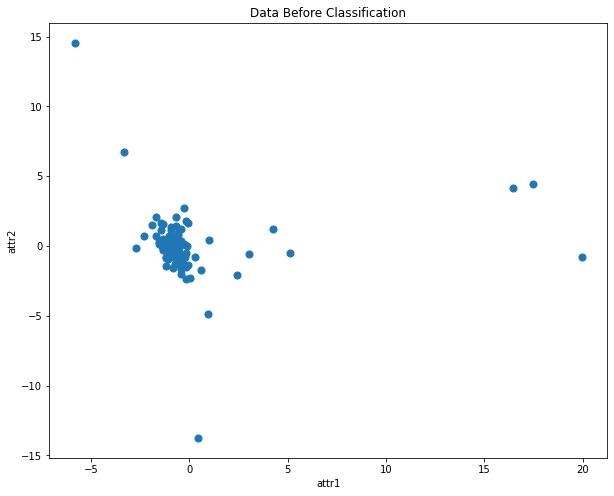

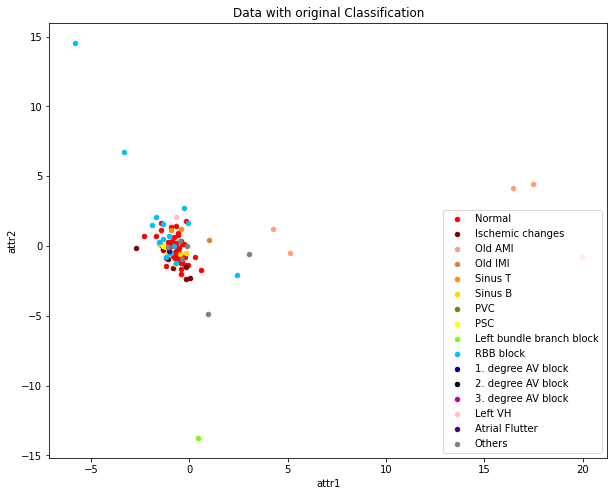

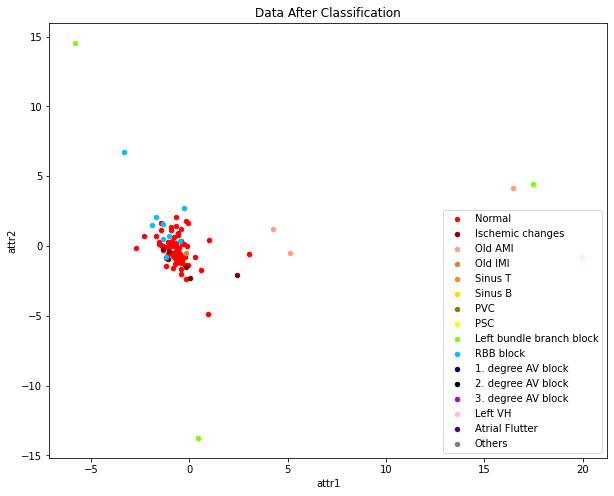

In [85]:
classification_plotter(predictions_svm)

## Accuarcy

In [86]:
SVMScore_fs = svm.score(X_test_fs, y_test)
print("Accuracy obtained by SVM Classifier :", round(SVMScore_fs*100, 2), "%")

Accuracy obtained by SVM Classifier : 67.03 %


## Report

In [87]:
y_pred_svm = svm.predict(X_test_fs)
print(report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         1.0       0.65      1.00      0.79        44
         2.0       0.67      0.57      0.62         7
         3.0       1.00      0.80      0.89         5
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         8.0       0.00      0.00      0.00         1
         9.0       0.33      1.00      0.50         1
        10.0       0.89      0.50      0.64        16
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         6

    accuracy                           0.67        91
   macro avg       0.29      0.32      0.29        91
weighted avg       0.58      0.67      0.59        91



## Model Accuracy | Precision | Recall

In [88]:
accsvm=accuracy_score(y_test, y_pred_svm)*100
print("Accuracy of KNN : ", round(accsvm, 2), "%")
precsvm=precision_score(y_test,y_pred_svm, average='macro')*100
print("Precision of KNN : ",round(precsvm, 2), "%")
recallsvm=recall_score(y_test,y_pred_svm, average='micro')*100
print("Recall of KNN : ",round(recallsvm, 2), "%")
f1svm=f1_score(y_test,y_pred_svm, average='weighted')*100
print("f1 score of KNN : ",round(f1svm, 2), "%")

Accuracy of KNN :  67.03 %
Precision of KNN :  29.47 %
Recall of KNN :  67.03 %
f1 score of KNN :  59.41 %


## Using Cross Validation kfold = 5

In [89]:
fs.fit(X, Y)
X = fs.transform(X)
scores = cross_validate(SVC(random_state = 1), X, Y, cv = 5, scoring = custom_scorer)

## Accuracy | Precision | Recall | F1 score  

In [90]:
test_accuracies = list(scores['test_accuracy'])
test_precisions = list(scores['test_precision'])
test_recalls = list(scores['test_recall'])
test_f1_scores = list(scores['test_f1'])
results_svm = {'Test Accuracies':test_accuracies,'test Precisions':test_precisions,'test Recalls':test_recalls,'test f1 scores':test_f1_scores}
results_svm = pd.DataFrame(results_dt)
results_svm

,accuracy,precision,recall,f1 score
mean,0.694233,0.491781,0.694233,0.685704
std,0.022948,0.041338,0.022948,0.024213
min,0.648352,0.431732,0.648352,0.639937
max,0.733333,0.589353,0.733333,0.728449


## Executing  30 Times

In [91]:
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
  
for iter in range(30):
    preprocessed_data = preprocessed_data.sample(frac=1).reset_index(drop=True)
    
    X = preprocessed_data.drop("label", axis=1)
    Y = preprocessed_data['label']
    
    X = scaler.fit_transform(X)
    
    fs = SelectKBest(score_func=f_classif, k=number_of_minimum_features)
    fs.fit(X, Y)
    X = fs.transform(X)


    scores = cross_validate(SVC(random_state = 1), X, Y, cv = 5, scoring = custom_scorer)
    accuracy_results.append(max(list(scores['test_accuracy'])))
    precision_results.append(max(list(scores['test_precision'])))
    recall_results.append(max(list(scores['test_recall'])))
    f1_results.append(max(list(scores['test_f1'])))
    
results_svm = {'accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1 score':f1_results}
results_svm = pd.DataFrame(results_svm)
results_svm

,accuracy,precision,recall,f1 score
0,0.747253,0.509951,0.747253,0.681646
1,0.744444,0.496960,0.744444,0.681520
2,0.714286,0.444891,0.714286,0.643213
3,0.758242,0.524621,0.758242,0.693991
4,0.769231,0.502976,0.769231,0.711291
5,0.733333,0.418254,0.733333,0.666770
6,0.733333,0.497347,0.733333,0.662372
7,0.744444,0.548252,0.744444,0.679775
8,0.714286,0.495190,0.714286,0.655561
9,0.722222,0.508532,0.722222,0.656399


## Analysing results

In [92]:
results_svm = results_svm.describe()
results_svm = results_svm.drop(["count", "25%", "50%", "75%"])
results_svm

,accuracy,precision,recall,f1 score
mean,0.733614,0.481236,0.733614,0.666548
std,0.017935,0.034493,0.017935,0.019891
min,0.703297,0.418254,0.703297,0.634660
max,0.769231,0.548252,0.769231,0.711291


## Naive Bayes

## Setting up the model

In [93]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

## Training 

In [94]:
nb.fit(X_train_fs, y_train)

GaussianNB()

## Classification results

In [95]:
predictions_nb = nb.predict(X_test_fs)
predictions_nb

array([10.,  6., 10., 10., 10., 10.,  4., 10.,  3.,  2.,  4.,  4.,  4.,
        9.,  4., 10., 10.,  7.,  4.,  4.,  4.,  4.,  2., 10.,  3.,  3.,
        4.,  4., 10., 10., 10.,  4., 16., 10., 10., 15., 10., 10.,  4.,
       10.,  4.,  4., 10.,  4., 10., 10., 10.,  4.,  4.,  4.,  4.,  4.,
       10., 10., 10., 10., 10., 10., 10., 10.,  4., 10., 10.,  4., 10.,
        4.,  4., 10., 16.,  4.,  3.,  4.,  9., 10., 10.,  4., 10., 10.,
       10., 10., 10., 10., 10., 10.,  4., 10.,  4.,  4.,  4.,  4.,  4.])

## Visualization

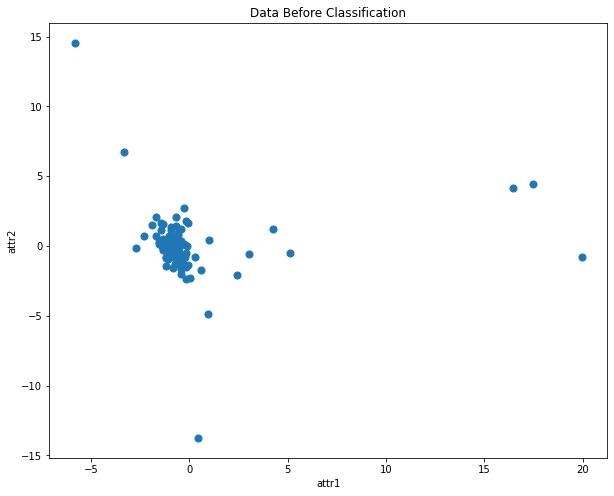

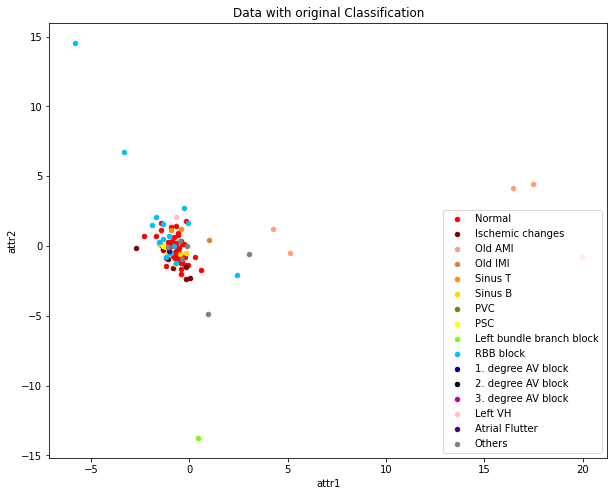

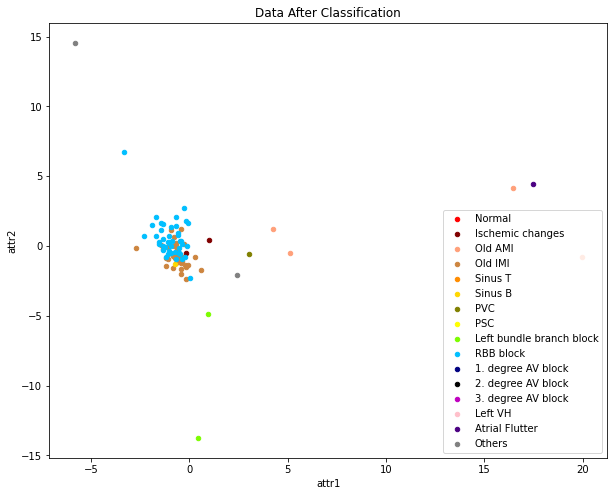

In [96]:
classification_plotter(predictions_nb)

## Accuracy

In [97]:
NaiveBayesScore_fs = nb.score(X_test_fs, y_test)
print("Accuracy obtained by Naive Bayes Classifier :", round(NaiveBayesScore_fs*100, 2), "%")

Accuracy obtained by Naive Bayes Classifier : 18.68 %


## Report

In [98]:
y_pred_nb = nb.predict(X_test_fs)
print(report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        44
         2.0       0.00      0.00      0.00         7
         3.0       1.00      0.80      0.89         5
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       1.00      0.17      0.29         6
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         1
         9.0       0.50      1.00      0.67         1
        10.0       0.25      0.69      0.37        16
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         6

    accuracy                           0.19        91
   macro avg       0.21      0.20      0.17        91
weighted avg       0.17      0.19      0.14        91



## Model Accuracy | Precision | Recall

In [99]:
accnb=accuracy_score(y_test, y_pred_nb)*100
print("Accuracy of KNN : ", round(accnb, 2), "%")
precnb=precision_score(y_test,y_pred_nb, average='macro')*100
print("Precision of KNN : ",round(precnb, 2), "%")
recallnb=recall_score(y_test,y_pred_nb, average='micro')*100
print("Recall of KNN : ",round(recallnb, 2), "%")
f1nb=f1_score(y_test,y_pred_nb, average='weighted')*100
print("f1 score of KNN : ",round(f1nb, 2), "%")

Accuracy of KNN :  18.68 %
Precision of KNN :  21.15 %
Recall of KNN :  18.68 %
f1 score of KNN :  13.95 %


## Using Cross Validation kfold = 5

In [100]:
fs.fit(X, Y)
X = fs.transform(X)
scores = cross_validate(GaussianNB(), X, Y, cv = 5, scoring = custom_scorer)

## Accuracy | Precision | Recall | F1 score  

In [101]:
test_accuracies = list(scores['test_accuracy'])
test_precisions = list(scores['test_precision'])
test_recalls = list(scores['test_recall'])
test_f1_scores = list(scores['test_f1'])
results_nb = {'Test Accuracies':test_accuracies,'test Precisions':test_precisions,'test Recalls':test_recalls,'test f1 scores':test_f1_scores}
results_nb = pd.DataFrame(results_nb)
results_nb

,Test Accuracies,test Precisions,test Recalls,test f1 scores
0,0.186813,0.357955,0.186813,0.123580
1,0.186813,0.346728,0.186813,0.135879
2,0.211111,0.354078,0.211111,0.191277
3,0.211111,0.279802,0.211111,0.168680
4,0.222222,0.323857,0.222222,0.176032


## Executing  30 Times

In [102]:
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
  
for iter in range(30):
    preprocessed_data = preprocessed_data.sample(frac=1).reset_index(drop=True)
    
    X = preprocessed_data.drop("label", axis=1)
    Y = preprocessed_data['label']
    
    X = scaler.fit_transform(X)
    
    fs = SelectKBest(score_func=f_classif, k=number_of_minimum_features)
    fs.fit(X, Y)
    X = fs.transform(X)


    scores = cross_validate(GaussianNB(), X, Y, cv = 5, scoring = custom_scorer)
    accuracy_results.append(max(list(scores['test_accuracy'])))
    precision_results.append(max(list(scores['test_precision'])))
    recall_results.append(max(list(scores['test_recall'])))
    f1_results.append(max(list(scores['test_f1'])))
    
results_nb = {'accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1 score':f1_results}
results_nb = pd.DataFrame(results_nb)
results_nb

,accuracy,precision,recall,f1 score
0,0.252747,0.442418,0.252747,0.203980
1,0.208791,0.373077,0.208791,0.170843
2,0.288889,0.467338,0.288889,0.283618
3,0.233333,0.449418,0.233333,0.199196
4,0.288889,0.488735,0.288889,0.269835
5,0.211111,0.539862,0.211111,0.196747
6,0.252747,0.442137,0.252747,0.206216
7,0.241758,0.401201,0.241758,0.208663
8,0.300000,0.490385,0.300000,0.279010
9,0.241758,0.371096,0.241758,0.206374


## Analysing results

In [103]:
results_nb = results_nb.describe()
results_nb = results_nb.drop(["count", "25%", "50%", "75%"])
results_nb

,accuracy,precision,recall,f1 score
mean,0.254330,0.436640,0.254330,0.218309
std,0.031023,0.054444,0.031023,0.036258
min,0.208791,0.325341,0.208791,0.164941
max,0.311111,0.551334,0.311111,0.291158


# Final results

## Clustering

### K-means

In [104]:
kmeans_results

,Silhouette score,Rand index
mean,0.006612,0.652579
std,0.011865,0.007564
min,-0.020617,0.635069
max,0.027544,0.665669


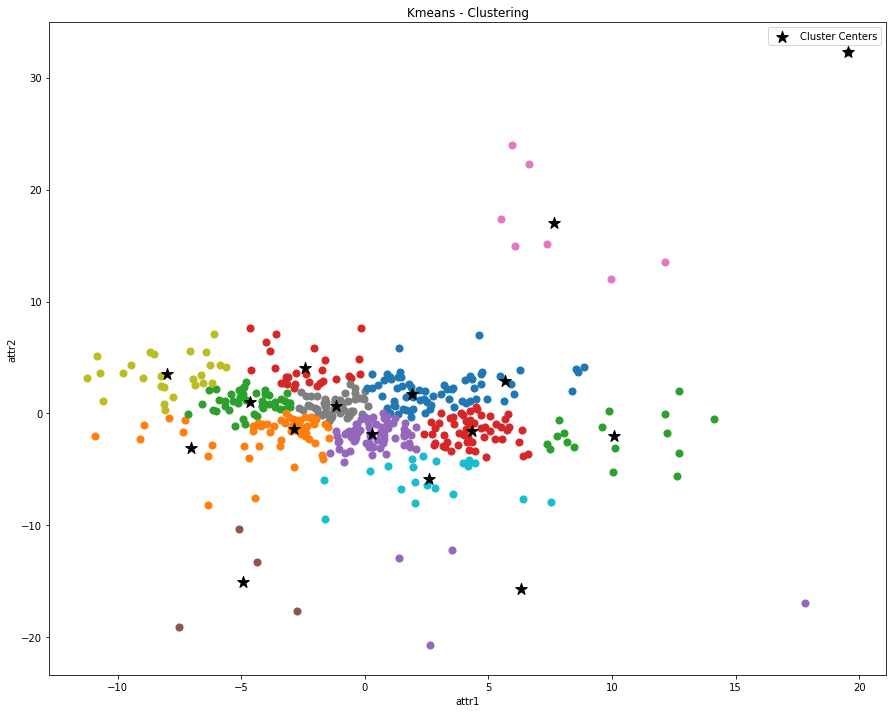

In [105]:
clustering_plotter()

## Classification

### KNN

In [106]:
results_knn

,accuracy,precision,recall,f1 score
mean,0.739662,0.568546,0.739662,0.685556
std,0.014665,0.046151,0.014665,0.017116
min,0.714286,0.491865,0.714286,0.653474
max,0.769231,0.657015,0.769231,0.717122


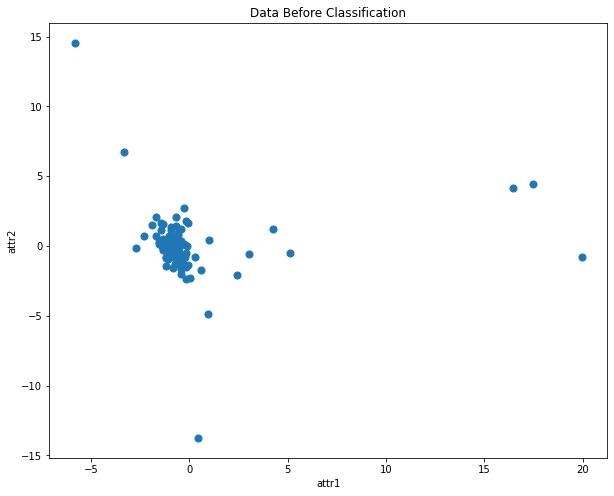

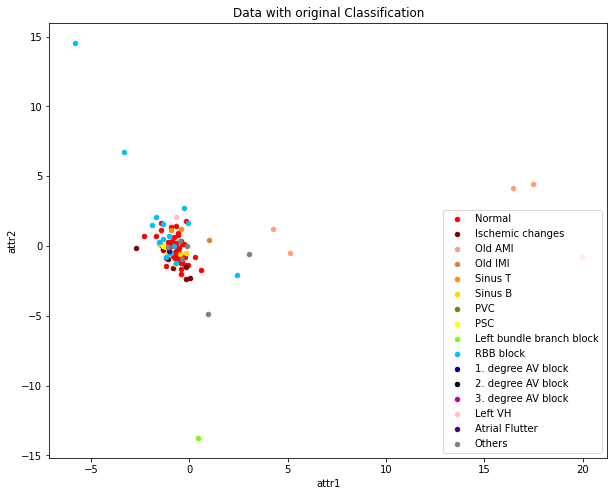

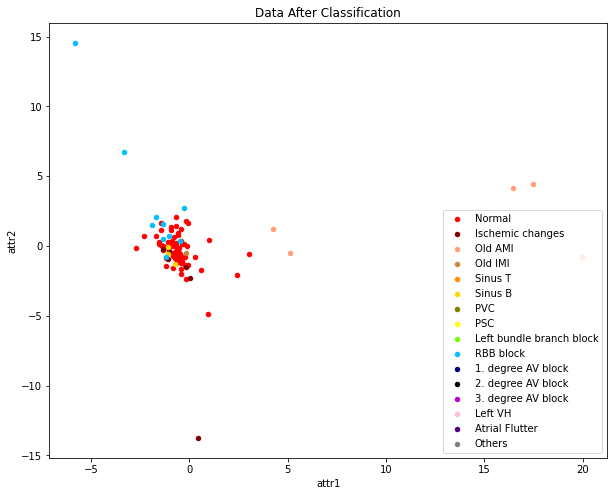

In [107]:
classification_plotter(predictions_knn)

### DecisionTree

In [108]:
results_dt

,accuracy,precision,recall,f1 score
mean,0.694233,0.491781,0.694233,0.685704
std,0.022948,0.041338,0.022948,0.024213
min,0.648352,0.431732,0.648352,0.639937
max,0.733333,0.589353,0.733333,0.728449


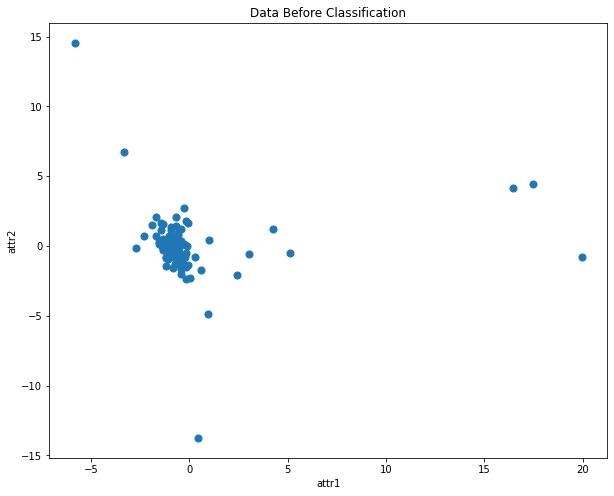

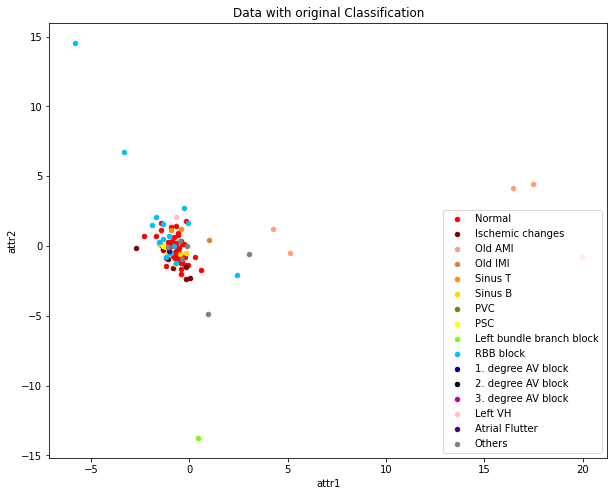

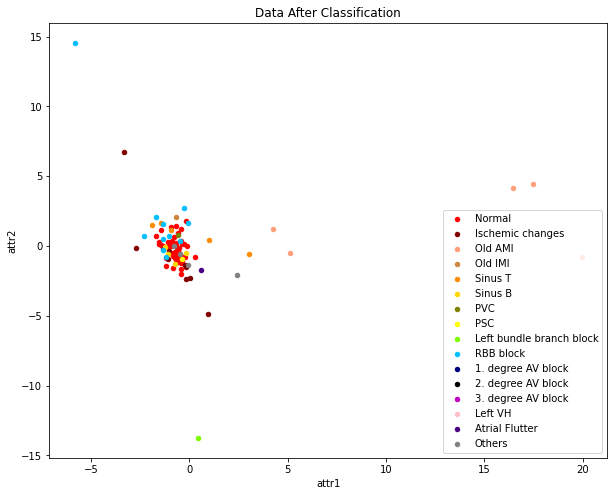

In [109]:
classification_plotter(predictions_dt)

### SVM

In [110]:
results_svm

,accuracy,precision,recall,f1 score
mean,0.733614,0.481236,0.733614,0.666548
std,0.017935,0.034493,0.017935,0.019891
min,0.703297,0.418254,0.703297,0.634660
max,0.769231,0.548252,0.769231,0.711291


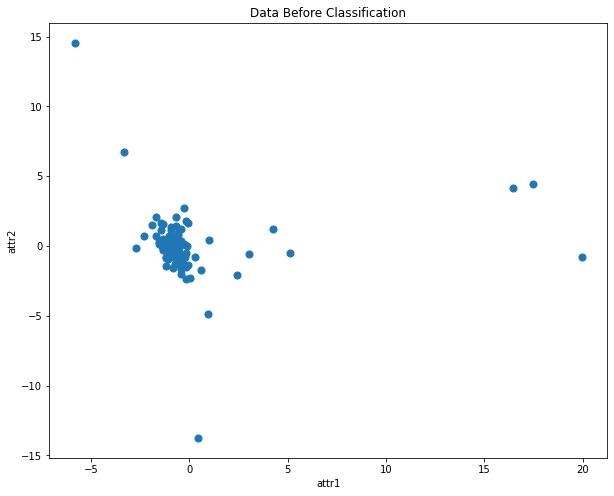

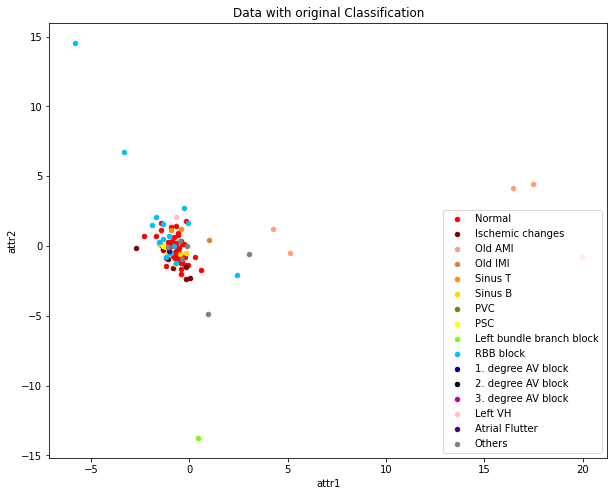

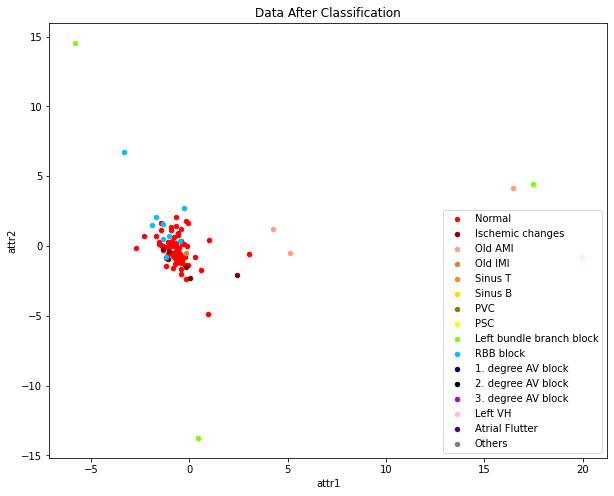

In [111]:
classification_plotter(predictions_svm)

### Naive Bayes

In [112]:
results_nb

,accuracy,precision,recall,f1 score
mean,0.254330,0.436640,0.254330,0.218309
std,0.031023,0.054444,0.031023,0.036258
min,0.208791,0.325341,0.208791,0.164941
max,0.311111,0.551334,0.311111,0.291158


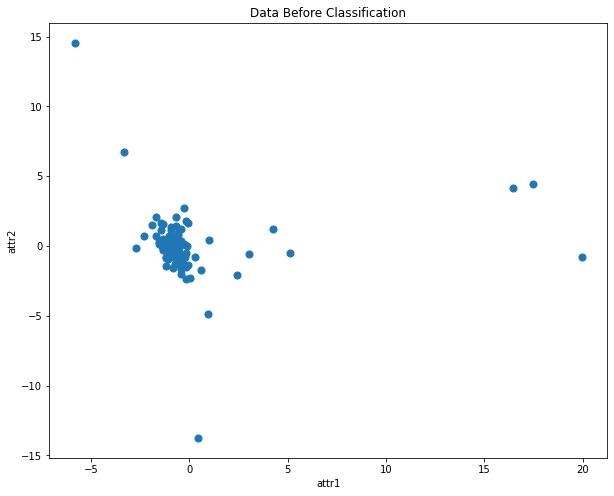

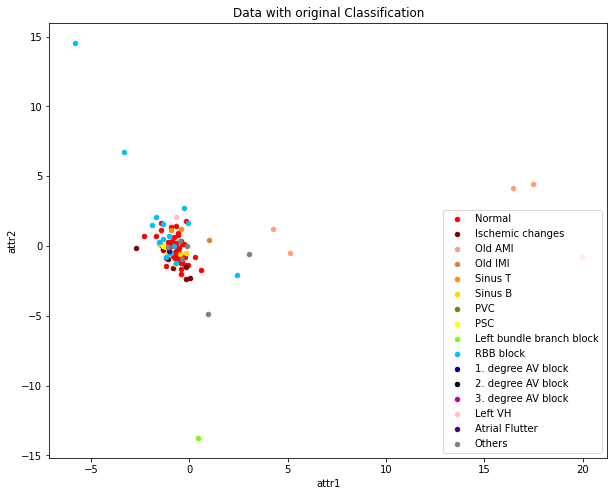

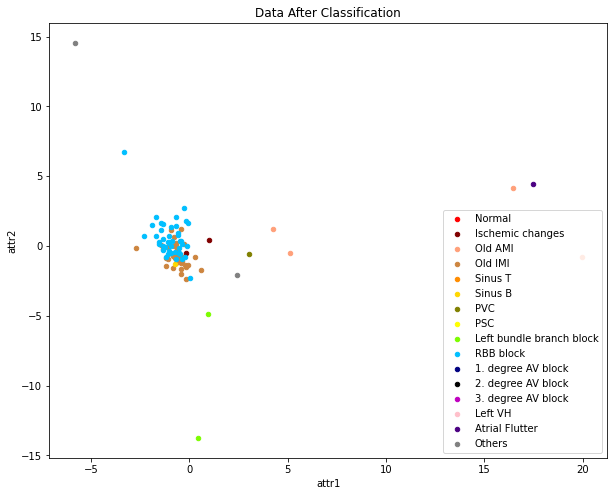

In [113]:
classification_plotter(predictions_nb)